# Trabajo 1

En este notebook se mostraran algunos modelos para la predicción del precio del bitcoin resueltos con mínimos cuadrados, y veremos algunas condiciones que tiene que cumplir nuestros datos, para que el modelo pueda ser resuelto con mínimos cuadrados

---

## Introducción

Actualmente el mercado del bitcoin es de los mas volatiles y debido a esto  puede llegar a generar una gran perdida o una gran ganancia al momento de invertir,por lo cual nos interesa plantear modelos de predicción de su precio, primero plantearemos un modelo no lineal y luego se plantearán modelos que relacionen el precio del bitcoin con el precio de algunas commodities , y observar si mediante estos modelos se puede encontrar alguna relación de estos mercados. Como nos interesa resolver los modelos mediante mínimos cuadrados, Iniciaremos mirando las condiciones que tienen que tener mis datos para que el modelo pueda ser resuelto:


## 1. Condiciones en el modelo

Relacionado con la naturaleza de los datos, nos interesa saber en un modelo resuelto con mínimos cuadrados que condiciones tiene que cumplir la matriz $A$ y el vector $b$ para que el modelo pueda ser resuelto.

Ejecuta el siguiente notebook:


## 2. Modelo no lineal para la predicción del precio del bitcoin

En el siguiente notebook se plantea un modelo no lineal para la predicción del precio bitcoin, y observaremos su funcionamiento con la predicción de los precios de los siguientes dias.

Ejecuta el siguiente notebook:


## 3. Bitcoin y su relación con algunas commodities

En el siguiente notebook se plantearan distintos modelos resueltos con minimos cuadrados,y observar si existe alguna relación del precio del bitcoin y el precio del oro,la plata y el petroleo.

Ejecuta el siguiente notebook:


In [ ]:
using CSV
using DataFrames

#Bitcoin Data
dataBitcoin = CSV.read("Bitcoin.csv",DataFrame);
dataBitcoin.Date .= dataBitcoin.Date;
dataBitcoin.PriceFloat = dataBitcoin.Price;

#Oil Data
dataOil = CSV.read("Oil.csv",DataFrame);
dataOil.Date .= dataOil.Date;
dataOil.PriceFloat = dataOil.Price;

#Gold Data
dataGold = CSV.read("Gold.csv",DataFrame);
dataGold.Date .= dataGold.Date;
dataGold.PriceFloat = dataGold.Price;

#Silver Data
dataSilver = CSV.read("Silver.csv",DataFrame);
dataSilver.Date .= dataSilver.Date;
dataSilver.PriceFloat = dataSilver.Price;

#Date in common
common=intersect(dataSilver.Date,dataOil.Date,dataGold.Date,dataBitcoin.Date)

#restrict the data
dataOil=dataOil[in(common).(dataOil.Date), :];
dataBitcoin=dataBitcoin[in(common).(dataBitcoin.Date), :];
dataGold=dataGold[in(common).(dataGold.Date), :];
dataSilver=dataSilver[in(common).(dataSilver.Date), :]



In [2]:
dataSilver.PriceFloat = dataSilver.Price;

dataOil.PriceFloat = dataOil.Price;

dataGold.Price .= replace.(dataGold.Price, "," => "");
dataGold.PriceFloat = parse.(Float64, dataGold.Price);

dataBitcoin.Price .= replace.(dataBitcoin.Price, "," => "");
dataBitcoin.PriceFloat = parse.(Float64, dataBitcoin.Price);

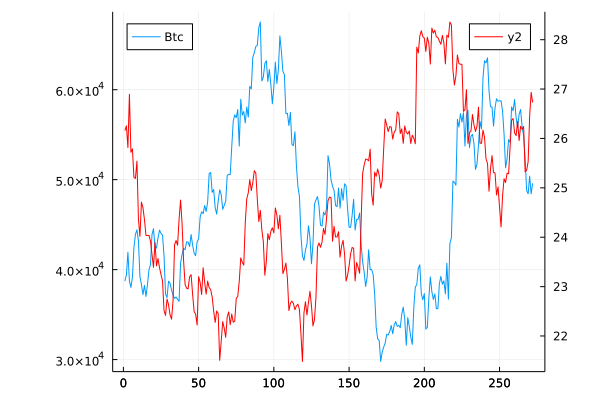

In [3]:
using Plots
plot(dataBitcoin.PriceFloat,label="Btc",legend=:topleft, rightmargin = 1.2Plots.cm, leftmargin = 1.2Plots.cm)
plot!(twinx(),dataSilver.PriceFloat,color=:red)

In [5]:
N = size(dataBitcoin.PriceFloat,1);
A = [ones(272,1) dataSilver.PriceFloat dataGold.PriceFloat dataOil.PriceFloat];
b = dataBitcoin.PriceFloat;
println(N);
println(A);
println(b);

272
[1.0 26.16 1985.0 109.33; 1.0 26.256 2000.4 106.02; 1.0 25.816 1988.2 108.7; 1.0 26.895 2043.3 123.7; 1.0 25.72 1995.9 119.4; 1.0 25.789 1966.6 115.68; 1.0 25.212 1935.9 107.67; 1.0 25.19 1922.3 110.6; 1.0 25.541 1943.8 103.41; 1.0 24.366 1900.7 95.72; 1.0 24.017 1887.6 91.59; 1.0 24.71 1926.3 92.81; 1.0 24.598 1910.4 92.1; 1.0 24.356 1907.4 92.35; 1.0 24.038 1912.05 92.65; 1.0 24.032 1908.0 91.62; 1.0 24.038 1899.8 91.07; 1.0 23.922 1902.0 91.76; 1.0 23.654 1871.5 93.66; 1.0 23.39 1856.2 92.07; 1.0 23.897 1869.4 95.46; 1.0 23.42 1842.1 93.1; 1.0 23.569 1837.4 89.88; 1.0 23.386 1836.6 89.66; 1.0 23.243 1827.9 89.36; 1.0 23.119 1821.8 91.32; 1.0 22.517 1807.8 92.31; 1.0 22.417 1804.1 90.27; 1.0 22.748 1810.3 88.26; 1.0 22.635 1801.5 88.2; 1.0 22.432 1796.4 88.15; 1.0 22.34 1786.6 86.82; 1.0 22.714 1795.0 86.61; 1.0 23.846 1832.0 87.35; 1.0 23.934 1855.0 85.6; 1.0 23.837 1844.2 83.31; 1.0 24.357 1834.1 85.14; 1.0 24.752 1844.9 86.9; 1.0 24.267 1845.5 86.96; 1.0 23.528 1814.9 85.43; 1

In [6]:
using LinearAlgebra
xhat3 = A\b

4-element Vector{Float64}:
 167137.0625489083
   -169.54242081090683
    -64.30840301863297
     10.332136758724863

In [127]:
N = size(dataBitcoin.PriceFloat,1);
days=Array((1:N))
A = [ones(N,1) days (days).^2];
b = dataBitcoin.PriceFloat;


[48214.6574411257, -28.206435923135345, 1.1218711234786457e-8]

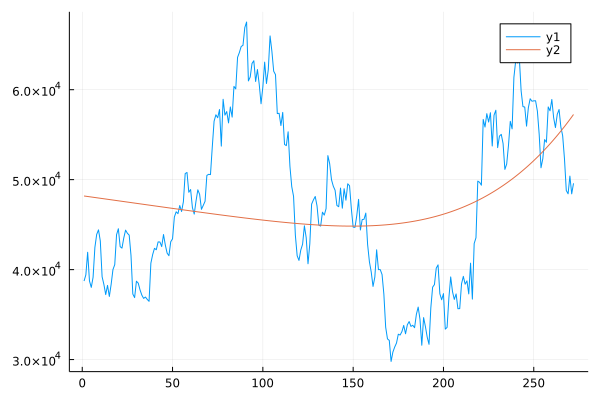

In [128]:

using Plots

xhat = A\b
print(xhat)
pred = xhat[3]*A[:,3]+xhat[2]*A[:,2] + xhat[1]*ones(N,1)
plot(days,b)
plot!(days,pred)


In [83]:
N = size(dataBitcoin.PriceFloat,1);
days=Array((1:N))
A = [ones(N,1)  days.^2 sqrt.(days)];
b = dataBitcoin.PriceFloat;

[42619.386255035286, -0.009209500388155344, 434.30966808876724]

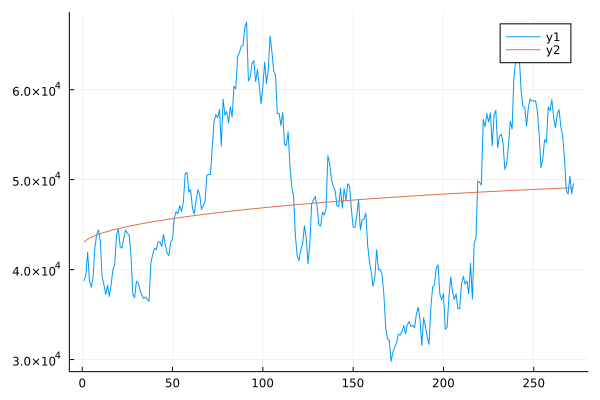

In [84]:
xhat = A\b
print(xhat)
pred =xhat[3]*A[:,3]+xhat[2]*A[:,2] + xhat[1]*ones(N,1)
plot(days,b)
plot!(days,pred)


In [122]:
N = size(dataBitcoin.PriceFloat,1);
days=Array((1:N))
A = [ones(N,1) sin.(days) sin.(days.^2) ];
b = dataBitcoin.PriceFloat;

[47168.375792911684, 174.74603606537877, 1192.4963092598468]

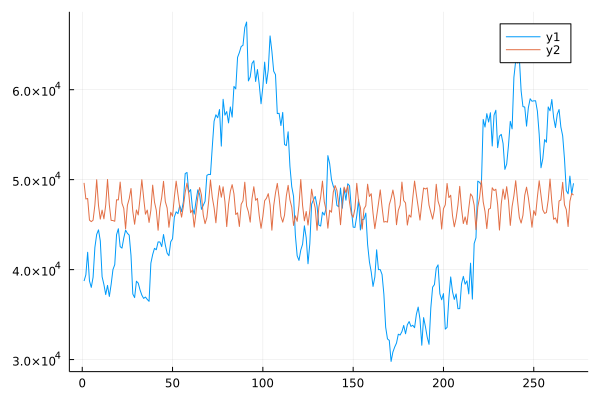

In [124]:
xhat = A\b
print(xhat)
pred =xhat[3]*A[:,3]+ 10xhat[2]*A[:,2] + xhat[1]*ones(N,1)
plot(days,b)
plot!(days,pred)